# Домашнее задание № 8

In [23]:
!pip install datasets

In [24]:
from collections import Counter
from datasets import load_dataset
import keras
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from string import punctuation
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
import re


## Задание 1 (4 балла)

Обучите 8 моделей для задачи классификации текста (датасет - lenta_40k ). А именно:  
1) модель с 1 GRU слоем;   
2) модель с 1 LSTM слоем    
3) модель с 1 GRU и 1 LSTM слоем  
4) модель с 1 BIGRU и 2 LSTM слоями  
5) модель с 5 GRU слоями и 3 LSTM слоями  
6) модель 1 BIGRU и 1 BILSTM слоями, причем так чтобы модели для forward и backward прохода отличались   
7) модель, где последовательно идут слои: LSTM, GRU, BILSTM, BIGRU, GRU, LSTM  



Параметр units и размер эмбединга можете задать любой. Оцените качество каждой модели и определите победителя.

In [25]:
from google.colab import drive

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/lenta_40k.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
def preprocess(text):
    tokens = text.lower().split()
    tokens = [token.strip(punctuation) for token in tokens]
    return tokens

vocab = Counter()

for text in data.text:
    vocab.update(preprocess(text))

filtered_vocab = set()

for word in vocab:
    if vocab[word] > 30:
        filtered_vocab.add(word)

word2id = {'PAD':0, 'UNK':1}

for word in filtered_vocab:
    word2id[word] = len(word2id)

id2word = {i:word for word, i in word2id.items()}
X = []

for text in data.text:
    tokens = preprocess(text)
    ids = [word2id.get(token, 1) for token in tokens]
    X.append(ids)

MAX_LEN = max(len(x) for x in X)
MEAN_LEN = np.median([len(x) for x in X])
MAX_LEN = int(MEAN_LEN + 30)

In [58]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN)
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05, stratify=y)

1. модель с 1 GRU слоем;

In [ ]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=30)(inputs, )


rnn = keras.layers.GRU(128, return_sequences=False)(embeddings)

outputs = keras.layers.Dense(len(label2id), activation='softmax')(rnn)

model = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=[keras.metrics.RecallAtPrecision(0.8, name='rec@prec')])

In [ ]:
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=1000,
         epochs=15)

Epoch 1/15
43/43 [==============================] - 105s 2s/step - loss: 2.5599 - rec@prec: 0.0000e+00 - val_loss: 2.3311 - val_rec@prec: 0.0000e+00
Epoch 2/15
43/43 [==============================] - 98s 2s/step - loss: 2.2715 - rec@prec: 0.0000e+00 - val_loss: 2.2016 - val_rec@prec: 0.0018
Epoch 3/15
43/43 [==============================] - 98s 2s/step - loss: 2.0699 - rec@prec: 7.1195e-04 - val_loss: 2.2295 - val_rec@prec: 4.5086e-04
Epoch 4/15
43/43 [==============================] - 97s 2s/step - loss: 1.8679 - rec@prec: 0.0220 - val_loss: 1.8267 - val_rec@prec: 0.0528
Epoch 5/15
43/43 [==============================] - 99s 2s/step - loss: 1.6057 - rec@prec: 0.1406 - val_loss: 1.7024 - val_rec@prec: 0.1159
Epoch 6/15
43/43 [==============================] - 103s 2s/step - loss: 1.4014 - rec@prec: 0.2673 - val_loss: 1.5959 - val_rec@prec: 0.1452
Epoch 7/15
43/43 [==============================] - 99s 2s/step - loss: 1.2092 - rec@prec: 0.3860 - val_loss: 1.5131 - val_rec@prec: 0.179

dict_keys(['loss', 'rec@prec', 'val_loss', 'val_rec@prec'])


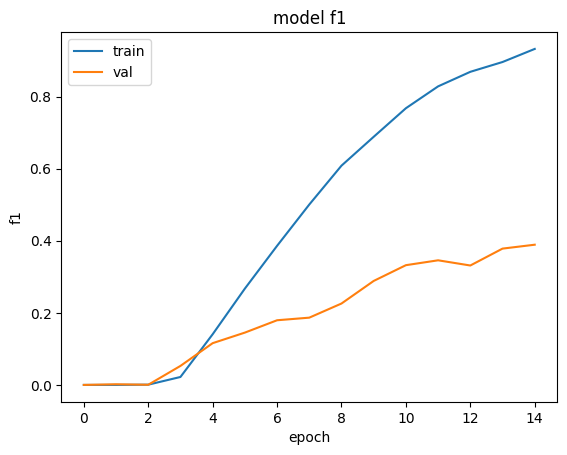

In [ ]:
print(model.history.history.keys())
plt.plot(model.history.history['rec@prec'])
plt.plot(model.history.history['val_rec@prec'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

2. модель с 1 LSTM слоем


In [ ]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=30)(inputs, )

rnn = keras.layers.LSTM(128, return_sequences=False)(embeddings)

outputs = keras.layers.Dense(len(label2id), activation='softmax')(rnn)

model = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=[keras.metrics.RecallAtPrecision(0.8, name='rec@prec')])

In [ ]:
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=1000,
         epochs=15)

Epoch 1/15
43/43 [==============================] - 125s 3s/step - loss: 2.5092 - rec@prec: 0.0000e+00 - val_loss: 2.3256 - val_rec@prec: 0.0000e+00
Epoch 2/15
43/43 [==============================] - 124s 3s/step - loss: 2.3070 - rec@prec: 0.0000e+00 - val_loss: 2.2804 - val_rec@prec: 4.5086e-04
Epoch 3/15
43/43 [==============================] - 121s 3s/step - loss: 2.1680 - rec@prec: 0.0020 - val_loss: 2.0451 - val_rec@prec: 0.0117
Epoch 4/15
43/43 [==============================] - 124s 3s/step - loss: 1.7826 - rec@prec: 0.0690 - val_loss: 1.6366 - val_rec@prec: 0.1528
Epoch 5/15
43/43 [==============================] - 121s 3s/step - loss: 1.5150 - rec@prec: 0.1883 - val_loss: 1.5333 - val_rec@prec: 0.2272
Epoch 6/15
43/43 [==============================] - 123s 3s/step - loss: 1.3005 - rec@prec: 0.3702 - val_loss: 1.3808 - val_rec@prec: 0.3598
Epoch 7/15
43/43 [==============================] - 124s 3s/step - loss: 1.1290 - rec@prec: 0.5185 - val_loss: 1.5006 - val_rec@prec: 0.27

dict_keys(['loss', 'rec@prec', 'val_loss', 'val_rec@prec'])


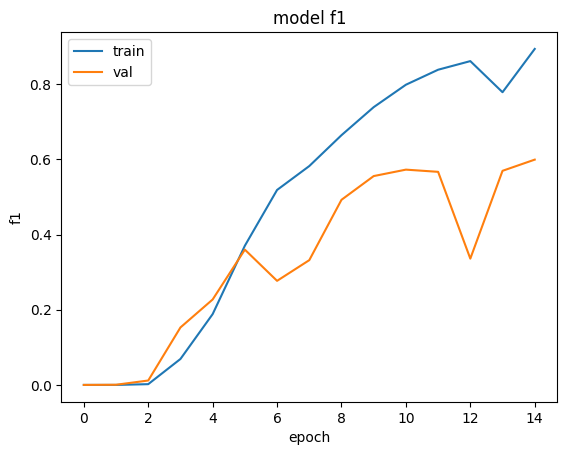

In [ ]:
print(model.history.history.keys())
plt.plot(model.history.history['rec@prec'])
plt.plot(model.history.history['val_rec@prec'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

3. модель с 1 GRU и 1 LSTM слоем


In [ ]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=30)(inputs, )


gru1 = keras.layers.GRU(128, return_sequences=True)(embeddings)
lstm1 = keras.layers.LSTM(128, return_sequences=False)(gru1)

outputs = keras.layers.Dense(len(label2id), activation='softmax')(lstm1)

model = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=[keras.metrics.RecallAtPrecision(0.8, name='rec@prec')])

In [ ]:
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=1000,
         epochs=15)

Epoch 1/15
43/43 [==============================] - 299s 7s/step - loss: 2.4513 - rec@prec: 0.0000e+00 - val_loss: 2.3145 - val_rec@prec: 4.5086e-04
Epoch 2/15
43/43 [==============================] - 279s 6s/step - loss: 2.2337 - rec@prec: 0.0000e+00 - val_loss: 2.0028 - val_rec@prec: 0.0000e+00
Epoch 3/15
43/43 [==============================] - 287s 7s/step - loss: 1.8674 - rec@prec: 0.0233 - val_loss: 1.8039 - val_rec@prec: 0.0595
Epoch 4/15
43/43 [==============================] - 278s 6s/step - loss: 1.6868 - rec@prec: 0.0816 - val_loss: 1.6855 - val_rec@prec: 0.0830
Epoch 5/15
43/43 [==============================] - 282s 7s/step - loss: 1.5820 - rec@prec: 0.0881 - val_loss: 1.6873 - val_rec@prec: 0.0902
Epoch 6/15
43/43 [==============================] - 282s 7s/step - loss: 1.4821 - rec@prec: 0.1473 - val_loss: 1.6315 - val_rec@prec: 0.1416
Epoch 7/15
43/43 [==============================] - 284s 7s/step - loss: 1.3608 - rec@prec: 0.2225 - val_loss: 1.5334 - val_rec@prec: 0.20

dict_keys(['loss', 'rec@prec', 'val_loss', 'val_rec@prec'])


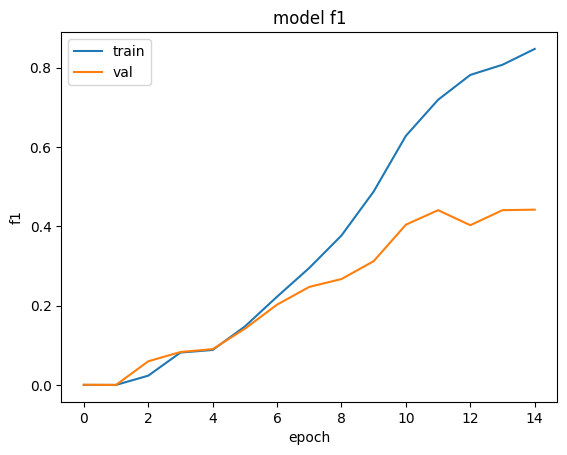

In [ ]:
print(model.history.history.keys())
plt.plot(model.history.history['rec@prec'])
plt.plot(model.history.history['val_rec@prec'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

4. модель с 1 BIGRU и 2 LSTM слоями


In [ ]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=30)(inputs, )


lstm1 = keras.layers.LSTM(128, return_sequences=True)(embeddings)
bigru1 = keras.layers.Bidirectional(keras.layers.GRU(128, return_sequences=True))(lstm1)
lstm2 = keras.layers.LSTM(128, return_sequences=False)(bigru1)

outputs = keras.layers.Dense(len(label2id), activation='softmax')(lstm2)

model = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=[keras.metrics.RecallAtPrecision(0.8, name='rec@prec')])

In [ ]:
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=1000,
         epochs=15)

Epoch 1/15
43/43 [==============================] - 688s 16s/step - loss: 2.4387 - rec@prec: 0.0000e+00 - val_loss: 2.3124 - val_rec@prec: 0.0000e+00
Epoch 2/15
43/43 [==============================] - 668s 16s/step - loss: 2.0722 - rec@prec: 0.0000e+00 - val_loss: 1.8568 - val_rec@prec: 0.0000e+00
Epoch 3/15
43/43 [==============================] - 669s 16s/step - loss: 1.7427 - rec@prec: 0.0000e+00 - val_loss: 1.7308 - val_rec@prec: 9.0171e-04
Epoch 4/15
43/43 [==============================] - 674s 16s/step - loss: 1.5562 - rec@prec: 7.1195e-05 - val_loss: 1.6881 - val_rec@prec: 4.5086e-04
Epoch 5/15
43/43 [==============================] - 676s 16s/step - loss: 1.3348 - rec@prec: 0.2455 - val_loss: 1.6401 - val_rec@prec: 0.1691
Epoch 6/15
43/43 [==============================] - 665s 15s/step - loss: 1.1703 - rec@prec: 0.4001 - val_loss: 1.4477 - val_rec@prec: 0.3165
Epoch 7/15
43/43 [==============================] - 667s 16s/step - loss: 1.0169 - rec@prec: 0.5571 - val_loss: 1.29

dict_keys(['loss', 'rec@prec', 'val_loss', 'val_rec@prec'])


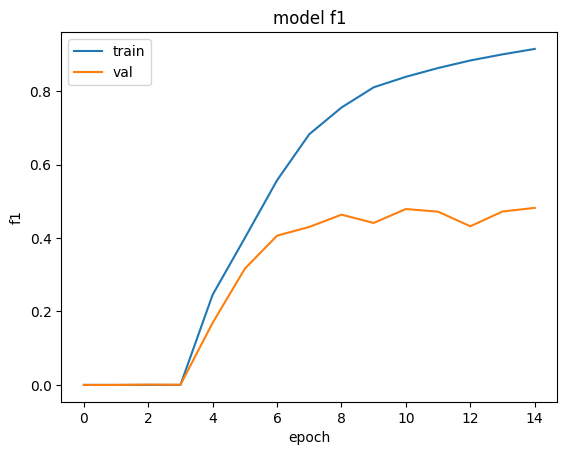

In [ ]:
print(model.history.history.keys())
plt.plot(model.history.history['rec@prec'])
plt.plot(model.history.history['val_rec@prec'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

5. модель с 5 GRU слоями и 3 LSTM слоями

In [32]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=30)(inputs, )

gru1 = keras.layers.GRU(128, return_sequences=True)(embeddings)
gru2 = keras.layers.GRU(128, return_sequences=True)(gru1)
lstm1 = keras.layers.LSTM(128, return_sequences=True)(gru2)
gru3 = keras.layers.GRU(128, return_sequences=True)(lstm1)
lstm2 = keras.layers.LSTM(128, return_sequences=True)(gru3)
gru4 = keras.layers.GRU(128, return_sequences=True)(lstm2)
lstm3 = keras.layers.LSTM(128, return_sequences=True)(gru4)
gru5 = keras.layers.GRU(128, return_sequences=True)(lstm3)


outputs = keras.layers.Dense(len(label2id), activation='softmax')(gru5)

model = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=[keras.metrics.RecallAtPrecision(0.8, name='rec@prec')])

In [62]:
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=1000,
         epochs=15)

Epoch 1/15


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 19) and (None, 200, 19) are incompatible


In [ ]:
print(model.history.history.keys())
plt.plot(model.history.history['rec@prec'])
plt.plot(model.history.history['val_rec@prec'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

6. модель 1 BIGRU и 1 BILSTM слоями, причем так чтобы модели для forward и backward прохода отличались

In [35]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=30)(inputs, )

bigru1 = keras.layers.Bidirectional(keras.layers.GRU(128, return_sequences=True),
                                    backward_layer=keras.layers.GRU(128, return_sequences=True,
                                                                    go_backwards=True))(embeddings)
bilstm1 = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True),
                                    backward_layer=keras.layers.LSTM(128, return_sequences=True,
                                                                    go_backwards=True))(bigru1)

outputs = keras.layers.Dense(len(label2id), activation='softmax')(bilstm1)

model = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=[keras.metrics.RecallAtPrecision(0.8, name='rec@prec')])

In [36]:
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=1000,
         epochs=15)

Epoch 1/15


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 19) and (None, 200, 19) are incompatible


In [ ]:
print(model.history.history.keys())
plt.plot(model.history.history['rec@prec'])
plt.plot(model.history.history['val_rec@prec'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

7. модель, где последовательно идут слои: LSTM, GRU, BILSTM, BIGRU, GRU, LSTM

In [60]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=30)(inputs, )

lstm1 = keras.layers.LSTM(128, return_sequences=True)(embeddings)
gru1 = keras.layers.GRU(128, return_sequences=True)(lstm1)
bilstm1 = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True))(gru1)
bigru1 = keras.layers.Bidirectional(keras.layers.GRU(128, return_sequences=True))(bilstm1)
gru2 = keras.layers.GRU(128, return_sequences=True)(bigru1)
lstm2 = keras.layers.LSTM(128, return_sequences=True)(gru2)


outputs = keras.layers.Dense(len(label2id), activation='softmax')(lstm2)

model = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=[keras.metrics.RecallAtPrecision(0.8, name='rec@prec')])

In [61]:
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=1000,
         epochs=15)

Epoch 1/15


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 19) and (None, 200, 19) are incompatible


In [ ]:
print(model.history.history.keys())
plt.plot(model.history.history['rec@prec'])
plt.plot(model.history.history['val_rec@prec'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Задание 2 (6 баллов)


На данных википедии (wikiann) обучите 2 модели:  
1) модель в которой будут использованы предобученные эмбединги слов и несколько BILSTM слоев.
1) модель в которой будут использованы предобученные эмбединги слов и несколько BIGRU слоев.

Сравните качество по метрикам. Также придумайте несколько сложных примеров и проверьте, какие сущности определяет каждая из моделей.

In [41]:
dataset = load_dataset("tner/wikiann", 'ru')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for tner/wikiann contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tner/wikiann
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [42]:
# словарь
vocab = Counter()

for sent in dataset['train']['tokens']:
    vocab.update([x.lower() for x in sent])

# индексируем слова
word2id = {'PAD':0, 'UNK':1}

for word in vocab:
    word2id[word] = len(word2id)
id2word = {i:word for word, i in word2id.items()}

# переводим тексты в последовательности индексов
X = []

for sent in dataset['train']['tokens']:
    tokens = [w.lower() for w in sent]
    ids = [word2id.get(token, 1) for token in tokens]
    X.append(ids)

# переводим тексты в последовательности индексов
X_test = []

for sent in dataset['test']['tokens']:
    tokens = [w.lower() for w in sent]
    ids = [word2id.get(token, 1) for token in tokens]
    X_test.append(ids)
MAX_LEN = max(len(x) for x in X)

# паддинг
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN, padding='post')
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_LEN, padding='post')

id2labels = {0:'O', 1:'B-PER', 2:'I-PER', 3:'B-ORG', 4:'I-ORG', 5: 'B-LOC', 6:'I-LOC', 7:'PAD'}
label2id = {v:k for k,v in id2labels.items()}
y = keras.preprocessing.sequence.pad_sequences(dataset['train']['tags'], value=7,
                                                  maxlen=MAX_LEN,  padding='post')
y_test = keras.preprocessing.sequence.pad_sequences(dataset['test']['tags'], value=7,
                                                       maxlen=MAX_LEN,  padding='post')

In [43]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs)

BISTLM1 = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True))(embeddings)
BISTLM2 = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True))(BISTLM1)

outputs = keras.layers.Dense(len(label2id), activation='softmax')(BISTLM2)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [44]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 54)]              0         
                                                                 
 embedding_10 (Embedding)    (None, 54, 100)           3601700   
                                                                 
 bidirectional_9 (Bidirecti  (None, 54, 256)           234496    
 onal)                                                           
                                                                 
 bidirectional_10 (Bidirect  (None, 54, 256)           394240    
 ional)                                                          
                                                                 
 dense_8 (Dense)             (None, 54, 8)             2056      
                                                                 
Total params: 4232492 (16.15 MB)
Trainable params: 4232492 

In [45]:
model.fit(X, y,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=15)

Epoch 1/15
157/157 [==============================] - 190s 1s/step - loss: 0.2462 - accuracy: 0.9321 - val_loss: 0.1436 - val_accuracy: 0.9569
Epoch 2/15
157/157 [==============================] - 151s 961ms/step - loss: 0.1227 - accuracy: 0.9612 - val_loss: 0.1035 - val_accuracy: 0.9679
Epoch 3/15
157/157 [==============================] - 150s 956ms/step - loss: 0.0663 - accuracy: 0.9791 - val_loss: 0.0607 - val_accuracy: 0.9821
Epoch 4/15
157/157 [==============================] - 149s 951ms/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.0547 - val_accuracy: 0.9839
Epoch 5/15
157/157 [==============================] - 151s 962ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.0556 - val_accuracy: 0.9852
Epoch 6/15
157/157 [==============================] - 148s 946ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0595 - val_accuracy: 0.9852
Epoch 7/15
157/157 [==============================] - 146s 934ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0655 - va

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


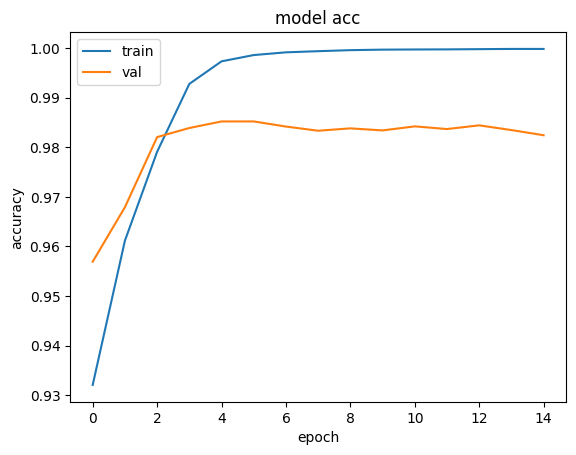

In [46]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [47]:
pred = model.predict(X_test).argmax(2)

print(classification_report(y_test.reshape(-1), pred.reshape(-1), labels=list(id2labels.keys()),
                                                                     target_names=list(id2labels.values()),
                                                                     zero_division=0))

313/313 [==============================] - 38s 116ms/step
              precision    recall  f1-score   support

           O       0.65      0.82      0.73      4560
       B-PER       0.71      0.70      0.70      4074
       I-PER       0.88      0.72      0.79      3542
       B-ORG       0.76      0.76      0.76      3060
       I-ORG       0.89      0.71      0.79      8008
       B-LOC       0.96      0.72      0.82      7544
       I-LOC       0.90      0.97      0.93     40480
         PAD       1.00      1.00      1.00    468732

    accuracy                           0.98    540000
   macro avg       0.84      0.80      0.82    540000
weighted avg       0.98      0.98      0.98    540000



In [48]:
def tokenize(text, word2id):
    # токенизирует и переводит в индексы
    tokens = re.findall('\w+|[^\w\s]+', text)
    ids = [word2id.get(token.lower(), 1) for token in tokens]
    return tokens, ids

def pred2tags(pred, id2label, length):
    # декодирует индексы в части речи
    # length нужно чтобы откидывать паддинги или некорректные предсказания
    pred = pred.argmax(2)[0, :length]
    labels = [id2label[l] for l in pred]
    return labels

def label_seq(text, word2id, id2label, max_len, model):
    tokens, ids = tokenize(text, word2id)
    pred = model.predict(keras.preprocessing.sequence.pad_sequences([ids],
                                                                       maxlen=max_len,
                                                                       padding='post'))
    labels = pred2tags(pred, id2label, len(ids))

    return list(zip(tokens, labels))

In [49]:
label_seq('Алексей сказал Светлане, чтобы она собиралась на поезд в Москву.', word2id, id2labels, MAX_LEN, model)

1/1 [==============================] - 0s 69ms/step


[('Алексей', 'I-PER'),
 ('сказал', 'B-LOC'),
 ('Светлане', 'I-LOC'),
 (',', 'I-LOC'),
 ('чтобы', 'I-LOC'),
 ('она', 'I-LOC'),
 ('собиралась', 'I-LOC'),
 ('на', 'I-LOC'),
 ('поезд', 'I-LOC'),
 ('в', 'I-LOC'),
 ('Москву', 'O'),
 ('.', 'I-LOC')]

Вторая модель:

In [50]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs)

BIGRU1 = keras.layers.Bidirectional(keras.layers.GRU(128, return_sequences=True))(embeddings)
BIGRU2 = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True))(BIGRU1)

outputs = keras.layers.Dense(len(label2id), activation='softmax')(BIGRU2)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [51]:
model.fit(X, y,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=15)

Epoch 1/15
157/157 [==============================] - 147s 882ms/step - loss: 0.2502 - accuracy: 0.9359 - val_loss: 0.1377 - val_accuracy: 0.9545
Epoch 2/15
157/157 [==============================] - 141s 893ms/step - loss: 0.0883 - accuracy: 0.9716 - val_loss: 0.0604 - val_accuracy: 0.9805
Epoch 3/15
157/157 [==============================] - 144s 921ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.0478 - val_accuracy: 0.9849
Epoch 4/15
157/157 [==============================] - 146s 932ms/step - loss: 0.0119 - accuracy: 0.9968 - val_loss: 0.0513 - val_accuracy: 0.9848
Epoch 5/15
157/157 [==============================] - 146s 933ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0548 - val_accuracy: 0.9852
Epoch 6/15
157/157 [==============================] - 140s 893ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0591 - val_accuracy: 0.9848
Epoch 7/15
157/157 [==============================] - 139s 889ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0637 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


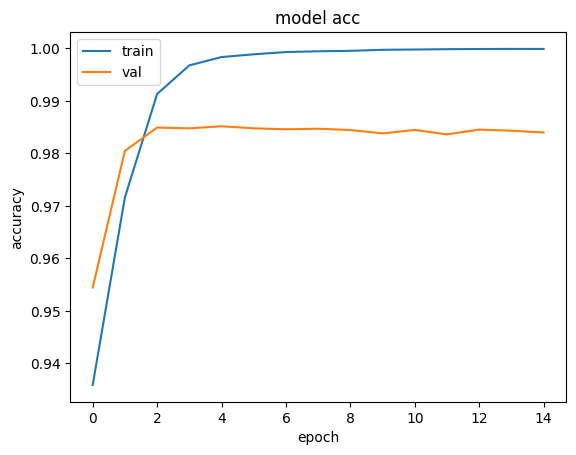

In [52]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
pred = model.predict(X_test).argmax(2)

print(classification_report(y_test.reshape(-1), pred.reshape(-1), labels=list(id2labels.keys()),
                                                                     target_names=list(id2labels.values()),
                                                                     zero_division=0))

313/313 [==============================] - 34s 102ms/step
              precision    recall  f1-score   support

           O       0.78      0.73      0.75      4560
       B-PER       0.60      0.79      0.68      4074
       I-PER       0.84      0.89      0.86      3542
       B-ORG       0.87      0.71      0.78      3060
       I-ORG       0.76      0.82      0.79      8008
       B-LOC       0.94      0.90      0.92      7544
       I-LOC       0.95      0.92      0.94     40480
         PAD       1.00      1.00      1.00    468732

    accuracy                           0.98    540000
   macro avg       0.84      0.84      0.84    540000
weighted avg       0.98      0.98      0.98    540000



In [54]:
label_seq('Алексей сказал Светлане, чтобы она собиралась на поезд в Москву.', word2id, id2labels, MAX_LEN, model)

1/1 [==============================] - 0s 39ms/step


[('Алексей', 'I-PER'),
 ('сказал', 'B-LOC'),
 ('Светлане', 'B-LOC'),
 (',', 'I-LOC'),
 ('чтобы', 'I-LOC'),
 ('она', 'I-LOC'),
 ('собиралась', 'I-LOC'),
 ('на', 'I-LOC'),
 ('поезд', 'I-LOC'),
 ('в', 'I-LOC'),
 ('Москву', 'O'),
 ('.', 'I-LOC')]